# Importamos as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from google.colab import drive

# Pegamos nosso dataset e o mostramos



In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/msft.csv'
df = pd.read_csv(path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


Vejamos quantos missing values nós temos nesse dataframe

In [ ]:
df.isnull().values.ravel().sum()

5

O nosso dataframe tem poucos missing values, não sendo necessário fazer lagum tratamento sobre esse aspecto

In [ ]:
print(df.columns.values)

['Name' 'Rating' 'No of people Rated' 'Category' 'Date' 'Price']


#Name
Não vale a pena fazer visualização dos nomes -coluna "Name"- porque são todos diferentes

#Rating
Observemos a distribuição de "Rating" que as pessoas escolheram:

In [ ]:
print(df['Rating'].value_counts())

4.0    1299
5.0     968
4.5     900
3.5     844
3.0     615
2.5     276
1.0     201
2.0     156
1.5      62
Name: Rating, dtype: int64


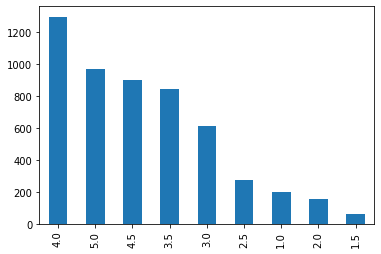

In [ ]:
df['Rating'].value_counts().plot(kind='bar')

Pode-se ver bem os valores, mas vamos ordená-los para melhor observá-los no gráfico

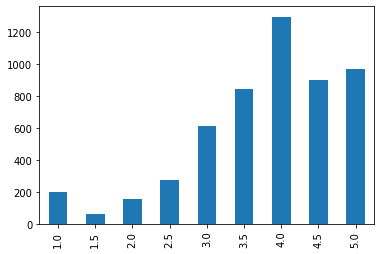

In [ ]:
sorted_rating = df['Rating'].sort_values(ascending = True)
sorted_rating.value_counts(sort = False).plot(kind='bar')

A maior parte dos produtos tem avaliação acima da média, principalmente com avaliação 4.0, e muitos poucos produtos possuem avaliação abaixo da média

#No of people Rated
Agora observemos a distribuição da coluna "No of people Rated"



In [ ]:
df['No of people Rated'].value_counts()

289    17
433    13
618    13
119    13
425    12
       ..
518     1
602     1
763     1
957     1
942     1
Name: No of people Rated, Length: 899, dtype: int64

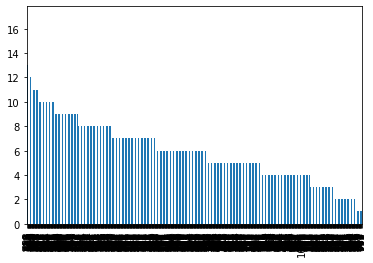

In [ ]:
df['No of people Rated'].value_counts().plot(kind='bar')

Limitemos o eixo y desse gráfico para facilitar a vizualização

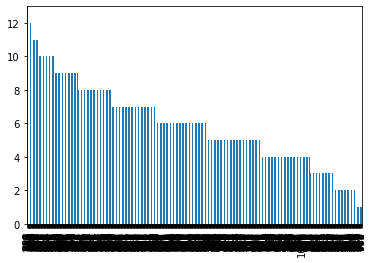

In [ ]:
plt.ylim(0, 13)
df['No of people Rated'].value_counts().plot(kind='bar')

Como se pode ver, não é tão interessante saber a quantidade de vezes que produtos da loja foram votados pelo mesmo número x de pessoas

Mais interessante seria tentar econtrar alguma correlação entre a quantidade de pessoas que votou em um produto e a sua avaliação

In [ ]:
large = df.nlargest(1, 'No of people Rated')
large

,Name,Rating,No of people Rated,Category,Date,Price
560,CDBS Facility Query,3.0,1000,Books,06-12-2016,Free


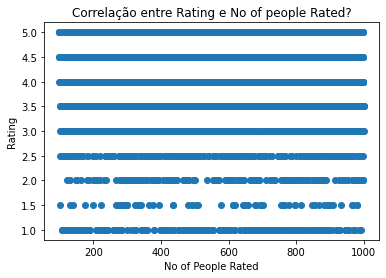

In [ ]:
x = df['No of people Rated']
y = df['Rating']
plt.scatter(x, y)
plt.title('Correlação entre Rating e No of people Rated?')
plt.xlabel('No of People Rated')
plt.ylabel('Rating')
plt.show()

Como se pode ver, não há relação entre a avaliação do produto e o número de pessoas que votou naquele produto

In [ ]:
'''sns.catplot(x="df['No of people Rated']", y='Principal Component', data=test);
#exibimos o grafico para 1 componente'''

'sns.catplot(x="df[\'No of people Rated\']", y=\'Principal Component\', data=test);\n#exibimos o grafico para 1 componente'

In [ ]:
'''sns.regplot(x=df['No of people Rated'].value_counts(), y = df, data = df)
'''

"sns.regplot(x=df['No of people Rated'].value_counts(), y = df, data = df)\n"

#Category
Observemos agora a coluna Category

In [ ]:
print(df['Category'].value_counts())

Music                      753
Books                      707
Business                   679
Health and Fitness         527
Developer Tools            500
Lifestyle                  492
News and Weather           483
Kids and Family            345
Social                     328
Food and Dining            166
Navigation and Maps        154
Multimedia Design          117
Government and Politics     70
Name: Category, dtype: int64


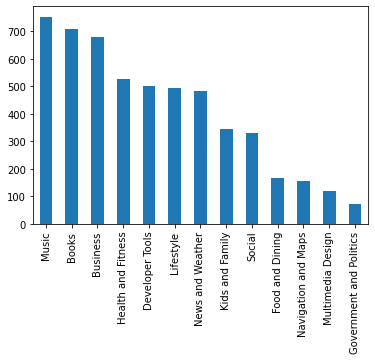

In [ ]:
df['Category'].value_counts().plot(kind='bar')

Como se pode observar, a maior parte dos produtos são das classes Music, Books ou Business, entretanto, os valores dessa feature são relativamente bem distribuídos, não parecendo ter outliers

Façamos um bloxpot para certificar-nos de que não há outliers

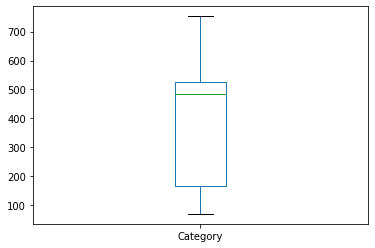

In [ ]:
df['Category'].value_counts().plot(kind='box')

Como o gráfico mostra, não há outliers na feature categoria do produto

#Date
Examinemos agora a feature "Date"

In [ ]:
print(df['Date'].value_counts())

30-01-2018    85
09-08-2014    21
29-01-2018    14
29-08-2016    13
08-09-2018    12
              ..
09-02-2013     1
09-05-2015     1
31-12-2014     1
07-12-2016     1
07-11-2018     1
Name: Date, Length: 2124, dtype: int64


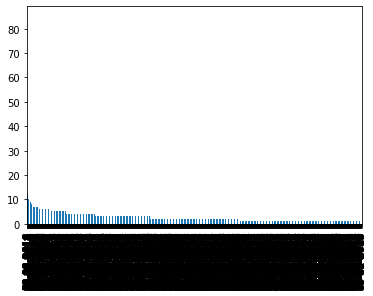

In [ ]:
df['Date'].value_counts().plot(kind='bar')

Não se pode vizualiar bem, limitemos o tamanho do eixo y

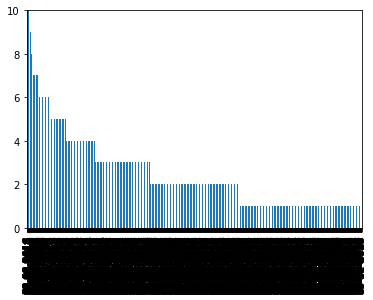

In [ ]:
plt.ylim(0, 10)
df['Date'].value_counts().plot(kind='bar')

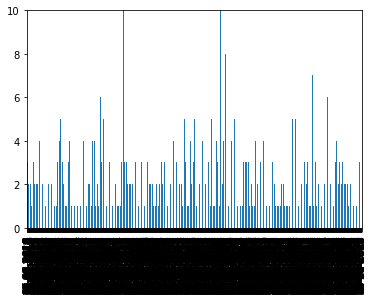

In [ ]:
plt.ylim(0, 10)
sorted_date = df['Date'].sort_values(ascending = True)
sorted_date.value_counts(sort = False).plot(kind='bar')

#Price

In [ ]:
df['Price'].value_counts()

Free          5163
₹ 269.00        55
₹ 54.00         14
₹ 549.00        10
₹ 109.00         9
₹ 164.00         8
₹ 219.00         5
₹ 144.00         5
₹ 79.00          4
₹ 69.00          4
₹ 1,099.00       4
₹ 154.00         3
₹ 1,624.00       3
₹ 99.00          3
₹ 59.00          2
₹ 189.00         1
₹ 139.00         1
₹ 1,521.80       1
₹ 1,899.00       1
₹ 64.00          1
₹ 119.00         1
₹ 279.00         1
₹ 319.00         1
₹ 114.00         1
₹ 624.00         1
₹ 1,349.00       1
₹ 2,149.00       1
₹ 824.00         1
₹ 489.00         1
₹ 1,149.00       1
₹ 324.00         1
₹ 54.50          1
₹ 574.00         1
₹ 329.40         1
₹ 299.00         1
₹ 209.00         1
₹ 699.00         1
₹ 5,449.00       1
₹ 194.00         1
₹ 2,599.00       1
₹ 134.00         1
₹ 89.50          1
₹ 94.00          1
₹ 434.00         1
Name: Price, dtype: int64

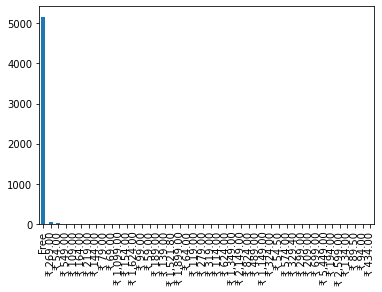

In [ ]:
df['Price'].value_counts().plot(kind='bar')

Pode-se ver que não é interessante ver a quantidade de produtos com um determinado valor a partir de um gráfico de barra

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2965 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3021 missing from current font.
  font.set_text(s

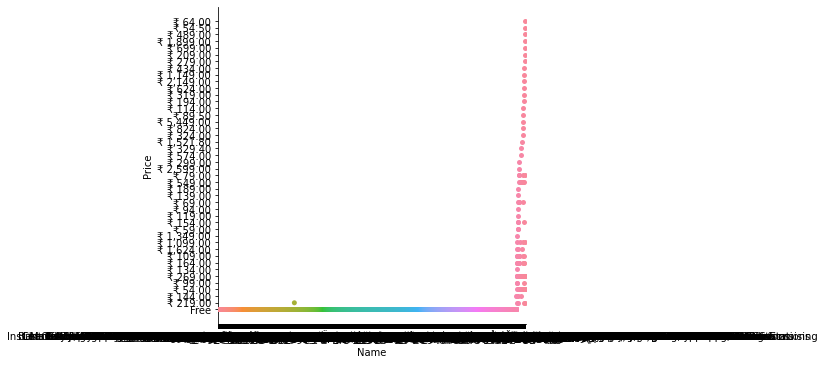

In [ ]:
x = df['Name']
y = df['Price']
sns.catplot(x , y, data = df)

In [ ]:
sns.catplot(x = df['Category'] , y = df['Price'], data = df)